In [30]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [31]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/Research_Mphil/Datasets/Diseases/2/Plant_leave_diseases_dataset_with_augmentation/train'
valid_path = 'D:/Research_Mphil/Datasets/Diseases/2/Plant_leave_diseases_dataset_with_augmentation/test'

In [32]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [33]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [34]:
# useful for getting number of output classes
folders = glob('D:/Research_Mphil/Datasets/Diseases/2/Plant_leave_diseases_dataset_with_augmentation/train/*')

In [35]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [36]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [37]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [38]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [39]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [40]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/Research_Mphil/Datasets/Diseases/2/Plant_leave_diseases_dataset_with_augmentation/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 15066 images belonging to 10 classes.


In [41]:
test_set = test_datagen.flow_from_directory('D:/Research_Mphil/Datasets/Diseases/2/Plant_leave_diseases_dataset_with_augmentation/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3769 images belonging to 10 classes.


In [42]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-42-0f3fcee075fe>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
471/471 [==============================] - 956s 2s/step - loss: 2.7777 - accuracy: 0.7141 - val_loss: 2.0560 - val_accuracy: 0.7970
Epoch 2/15
471/471 [==============================] - 1299s 3s/step - loss: 2.0974 - accuracy: 0.8074 - val_loss: 1.7372 - val_accuracy: 0.8358
Epoch 3/15
471/471 [==============================] - 854s 2s/step - loss: 1.6835 - accuracy: 0.8511 - val_loss: 2.4802 - val_accuracy: 0.8183
Epoch 4/15
471/471 [==============================] - 811s 2s/step - loss: 1.6443 - accuracy: 0.8625 - val_loss: 2.1912 - val_accuracy: 0.8461
Epoch 5/15
471/471 [==============================] - 798s 2s/step - loss: 1.8848 - accuracy: 0.8645 - val_loss: 2.0815 - val_accuracy: 0.8628
Epoch 6/15
471/471 [==============================] - 799s 2s/step - loss: 1.6714 - accuracy: 0.8746 - val_loss: 2.2094 - val_accuracy: 0.8533
Epoch 7/15
471/471 [==============================] - 2175s 5s/step - loss: 1.6874 - accuracy: 0.8861 - val_loss: 3.2707 - val_accuracy: 0.83

In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-21-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
471/471 [==============================] - 851s 2s/step - loss: 1.2833 - accuracy: 0.9130 - val_loss: 2.5274 - val_accuracy: 0.8596
Epoch 2/20
471/471 [==============================] - 797s 2s/step - loss: 1.4999 - accuracy: 0.9074 - val_loss: 2.2531 - val_accuracy: 0.8819
Epoch 3/20
471/471 [==============================] - 793s 2s/step - loss: 1.4524 - accuracy: 0.9127 - val_loss: 2.6908 - val_accuracy: 0.8679
Epoch 4/20
471/471 [==============================] - 784s 2s/step - loss: 1.3754 - accuracy: 0.9168 - val_loss: 2.9988 - val_accuracy: 0.8620
Epoch 5/20
471/471 [==============================] - 789s 2s/step - loss: 1.2702 - accuracy: 0.9235 - val_loss: 3.4707 - val_accuracy: 0.8490
Epoch 6/20
471/471 [==============================] - 785s 2s/step - loss: 1.2025 - accuracy: 0.9293 - val_loss: 3.0116 - val_accuracy: 0.8742
Epoch 7/20
471/471 [==============================] - 789s 2s/step - loss: 1.1870 - accuracy: 0.9278 - val_loss: 2.5813 - val_accuracy: 0.8851

In [23]:
import matplotlib.pyplot as plt

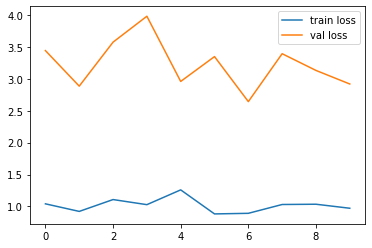

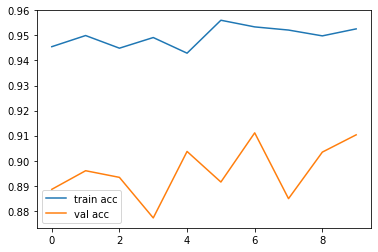

118/118 [==============================] - 159s 1s/step - loss: 2.9206 - accuracy: 0.9103
Test accuracy is 0.910321056842804


<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


 # To get the test accuracy
score,accuracy =model.evaluate(test_set,verbose=1)
print("Test accuracy is {}".format(accuracy))